In [3]:
from nbodykit.lab import LinearMesh, cosmology, FFTPower
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as scpimg
import nbodykit
import h5py

%matplotlib inline

In [2]:
def generate_divergence(Nmesh=128, BoxSize=600, seed=42, klim=0.1):
    def my_Plin(k):
        l = Plin(k)
        l[k>klim] = 0
        return l
    cosmo = cosmology.Planck15
    Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='NoWiggleEisensteinHu')
    mesh = LinearMesh(my_Plin, Nmesh=Nmesh, BoxSize=BoxSize, seed=seed)
    density = mesh.paint(mode='real')
    
    f = cosmo.scale_independent_growth_rate(0.0)
    divergence = - 100 * cosmo.h * f * (density[...] - 1)
    
    output_filename = 'mock_divergence_mesh_{}_box_{}_slim_{}.h5'.format(Nmesh, BoxSize, int(1/klim))
    h5f = h5py.File(output_filename, 'w')
    h5f.create_dataset('divergence', data=divergence)
    h5f.close()
    print("Finished writing to {}".format(output_filename))

In [6]:
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='NoWiggleEisensteinHu')
f = cosmo.scale_independent_growth_rate(0.0)
100 * cosmo.h
print(-100 * cosmo.h * f )

-35.2150910460585


In [5]:
klim_list = [1/20.0,1.0/14.0,1.0/10.0, 1.0/6.0, 1.0/2.0]
for klim in klim_list:
    generate_divergence(Nmesh=360, BoxSize=720, klim=klim)

Finished writing to mock_divergence_mesh_360_box_720_slim_20.h5
Finished writing to mock_divergence_mesh_360_box_720_slim_14.h5
Finished writing to mock_divergence_mesh_360_box_720_slim_10.h5
Finished writing to mock_divergence_mesh_360_box_720_slim_6.h5
Finished writing to mock_divergence_mesh_360_box_720_slim_2.h5


In [7]:
klim_list = [1/40.0,1.0/30.0,1.0/20.0, 1.0/15.0, 1.0/10.0]
for klim in klim_list:
    generate_divergence(Nmesh=100, BoxSize=1000, klim=klim)

Finished writing to mock_divergence_mesh_100_box_1000_slim_40.h5
Finished writing to mock_divergence_mesh_100_box_1000_slim_30.h5
Finished writing to mock_divergence_mesh_100_box_1000_slim_20.h5
Finished writing to mock_divergence_mesh_100_box_1000_slim_15.h5
Finished writing to mock_divergence_mesh_100_box_1000_slim_10.h5


In [14]:
klim_list = [1/18.0,1.0/15.0,1.0/12.0, 1.0/9.0, 1.0/3.0]
for klim in klim_list:
    generate_divergence(Nmesh=100, BoxSize=300, klim=klim)

Finished writing to mock_divergence_mesh_100_box_300_slim_18.h5
Finished writing to mock_divergence_mesh_100_box_300_slim_15.h5
Finished writing to mock_divergence_mesh_100_box_300_slim_12.h5
Finished writing to mock_divergence_mesh_100_box_300_slim_9.h5
Finished writing to mock_divergence_mesh_100_box_300_slim_3.h5


0 0.05555555555555555
1 0.06666666666666667
2 0.08333333333333333
3 0.1111111111111111
4 0.3333333333333333


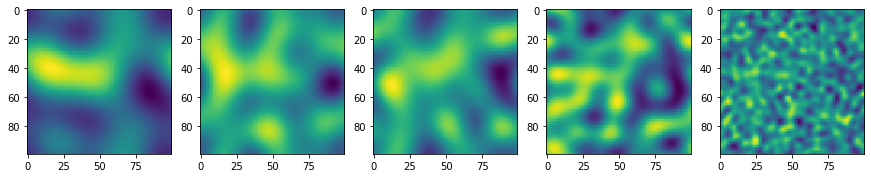

In [15]:
plt.figure(figsize=(15,5))
klim_list = [1/18.0,1.0/15.0,1.0/12.0, 1.0/9.0, 1.0/3.0]
for i, klim in enumerate(klim_list):
    print(i, klim)
    f = h5py.File('mock_divergence_mesh_100_box_300_slim_{}.h5'.format(int(1/klim)), 'r')
    divergence_field = f['divergence'][...]
    f.close()
    
    plt.subplot(1,5,i+1)
    plt.imshow(divergence_field[:,:,10])

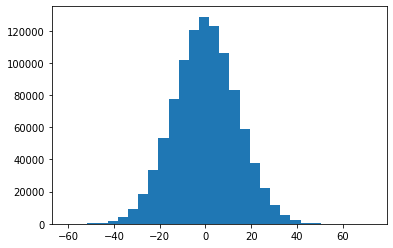

In [12]:
f = h5py.File('mock_divergence_mesh_100_box_1000_slim_{}.h5'.format(10, 'r'))
divergence_field = f['divergence'][...]
f.close()
_ = plt.hist(divergence_field.flatten(), bins=30)